## Task 1

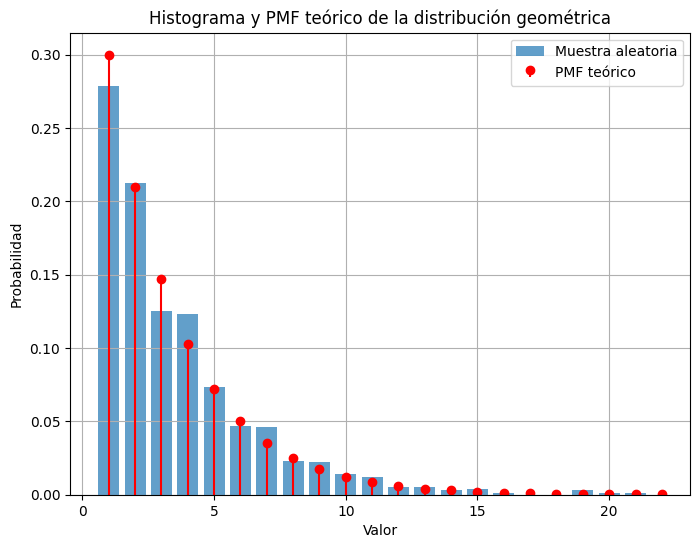

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def geometrica_pmf(k, p):
    # pmf geometrica
    return (1 - p) ** (k - 1) * p

def transf_inv(p, size):
    # muestras aleatrias usand transfrmacin inversa
    u = np.random.rand(size)
    return np.ceil(np.log(1 - u) / np.log(1 - p))

# Parámetro de la distribución geométrica (probabilidad de éxito en un intento)
p = 0.3

# Tamaño de la muestra aleatoria
tamano_muestra = 1000

# Generar muestras aleatorias de la distribución geométrica
muestra = transf_inv(p, tamano_muestra)

# Calcular el rango de valores posibles para el eje x del histograma
x_range = np.arange(1, int(muestra.max()) + 1)

# Calcular el PMF teórico de la distribución geométrica
pmf_teorica = geometrica_pmf(x_range, p)

# Plot del histograma y el PMF teórico
plt.figure(figsize=(8, 6))
plt.hist(muestra, bins=x_range - 0.5, density=True, alpha=0.7, rwidth=0.8, label='Muestra aleatoria')
plt.stem(x_range, pmf_teorica, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='PMF teórico')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Histograma y PMF teórico de la distribución geométrica')
plt.legend()
plt.grid(True)
plt.show()


## Task 2

C:\Users\Jose\AppData\Local\Temp\ipykernel_22760\2011545688.py:6: DeprecationWarning: Using factorial() with floats is deprecated
  return np.exp(-lambd) * (lambd ** k) / np.math.factorial(k)


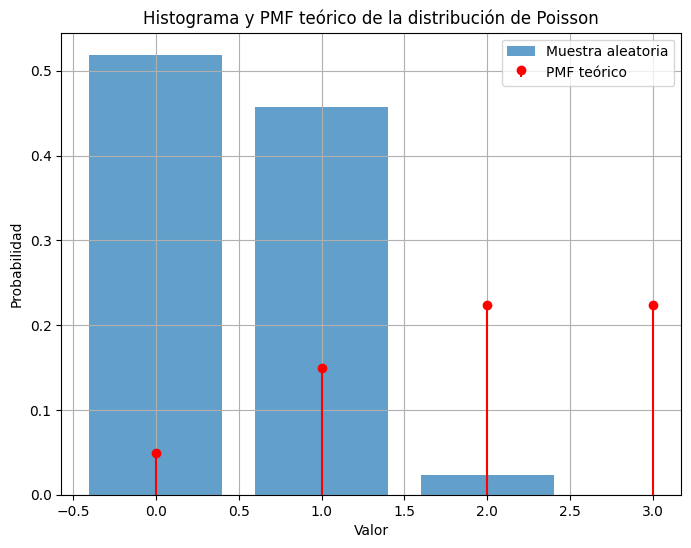

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_pmf(k, lambd):
    # pmf de poisson
    return np.exp(-lambd) * (lambd ** k) / np.math.factorial(k)

def exponencial_pdf(x, scale):
    # pdf exponencial
    return (1 / scale) * np.exp(-x / scale)

def generate_poisson_sample(size, lambd):
    # muestras aleatrias cn el metodo de rechazo
    scale = 1 / lambd  
    samples = []
    while len(samples) < size:
        x = np.random.exponential(scale)
        u = np.random.uniform(0, 1)
        C = poisson_pmf(np.floor(x), lambd) / exponencial_pdf(x, scale)
        # Rechazar o aceptar la muestra
        if u <= C:
            samples.append(np.floor(x))
    return np.array(samples[:size])

# parametro de la distribución de Poisson
lambd = 3

# tamaño de muestra
tamano_muestra = 1000

# muestras
muestra = generate_poisson_sample(tamano_muestra, lambd)

# Calcular el rango de valores posibles para el eje x del histograma
x_range = np.arange(0, int(muestra.max()) + 1)

# Vectorizar la función poisson_pmf para que funcione con un array de valores
pmf_teorica_vec = np.vectorize(poisson_pmf, excluded=[1])

# Calcular el PMF teórico de la distribución de Poisson
pmf_teorica = pmf_teorica_vec(x_range, lambd)

# Plot del histograma y el PMF teórico
plt.figure(figsize=(8, 6))
plt.hist(muestra, bins=x_range - 0.5, density=True, alpha=0.7, rwidth=0.8, label='Muestra aleatoria')
plt.stem(x_range, pmf_teorica, 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='PMF teórico')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Histograma y PMF teórico de la distribución de Poisson')
plt.legend()
plt.grid(True)
plt.show()


## Task 3

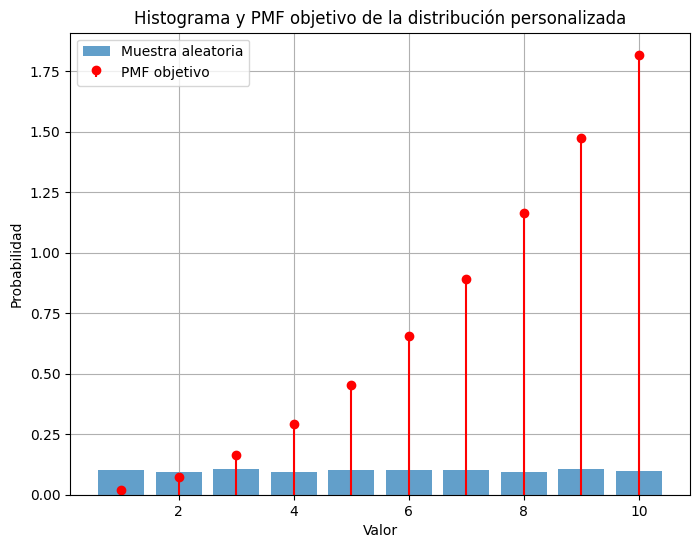

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# dist probabilidad discreta personalizada: f(x) = x^2 / 55
def pmf_personalizada(x):
    return (x ** 2) / 55

# dist de propuesta: Distribución uniforme sobre el intervalo [1, 10]
def pdf_propuesta(x):
    return 1 / 10  # pdf unifrme

def generar_muestra_personalizada(tamaño):
    muestras = []
    while len(muestras) < tamaño:
        x = np.random.randint(1, 11)
        C = pmf_personalizada(x) / pdf_propuesta(x)
        u = np.random.uniform(0, C)
        if u <= pmf_personalizada(x):
            muestras.append(x)
    return np.array(muestras[:tamaño])

# Tamaño de la muestra aleatoria
tamano_muestra = 1000

# Generar una muestra aleatoria de la distribución personalizada
muestra = generar_muestra_personalizada(tamano_muestra)

# Plot del histograma de la muestra
plt.figure(figsize=(8, 6))
plt.hist(muestra, bins=np.arange(1, 12) - 0.5, density=True, alpha=0.7, rwidth=0.8, label='Muestra aleatoria')
plt.stem(np.arange(1, 11), pmf_personalizada(np.arange(1, 11)), 'r', markerfmt='ro', basefmt=" ", linefmt='r', label='PMF objetivo')
plt.xlabel('Valor')
plt.ylabel('Probabilidad')
plt.title('Histograma y PMF objetivo de la distribución personalizada')
plt.legend()
plt.grid(True)
plt.show()
